In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('SHL_categ.csv')

df.columns = df.columns.str.replace(' ', '_')
df.head()

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,20−29,Software Engineer,Low,Normal,Moderate,Normal,Overweight,Normal,Low,No
1,2,Male,20−29,Doctor,Low,Normal,Moderate,High,Normal,Normal,High,No
2,3,Male,20−29,Doctor,Low,Normal,Moderate,High,Normal,Normal,High,No
3,4,Male,20−29,Sales Representative,Low,Bad,Low,High,Obese,High,Low,Sleep Apnea
4,5,Male,20−29,Sales Representative,Low,Bad,Low,High,Obese,High,Low,Sleep Apnea


In [2]:
df.isna().sum()

Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [3]:
df.Sleep_Disorder.fillna('No', inplace=True)
df.Sleep_Disorder.value_counts()

C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_30528\2528085386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Sleep_Disorder.fillna('No', inplace=True)


Sleep_Disorder
No             219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

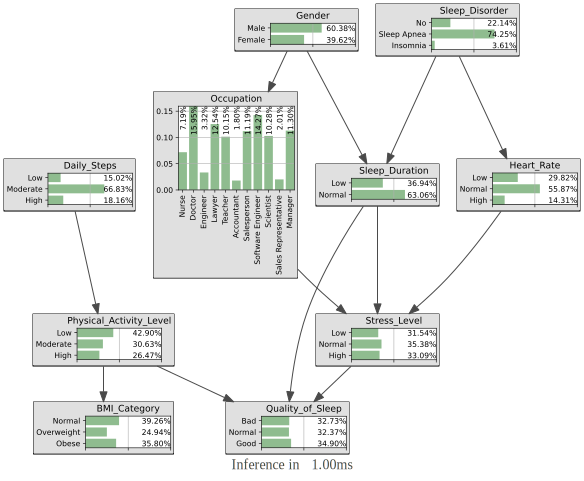

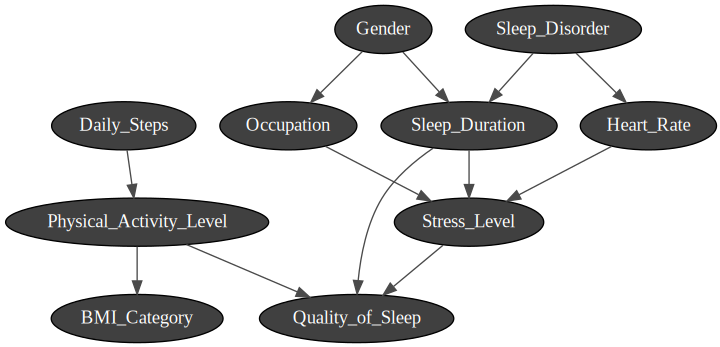

(None, None)

In [4]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Create a Bayesian Network
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


bn = gum.fastBN('Daily_Steps{Low|Moderate|High} -> Physical_Activity_Level{Low|Moderate|High}; '
                'Gender{Male|Female} -> Occupation{Nurse|Doctor|Engineer|Lawyer|Teacher|Accountant|Salesperson|Software Engineer|Scientist|Sales Representative|Manager}; '
                'Stress_Level{Low|Normal|High} -> Quality_of_Sleep{Bad|Normal|Good}; '
                'Physical_Activity_Level -> BMI_Category{Normal|Overweight|Obese}; '
                'Sleep_Duration{Low|Normal} -> Quality_of_Sleep; '
                'Sleep_Duration -> Stress_Level; '
                'Sleep_Disorder{No|Sleep Apnea|Insomnia} -> Heart_Rate{Low|Normal|High}; '
                'Occupation -> Stress_Level; '
                'Sleep_Disorder -> Sleep_Duration; '
                'Gender -> Sleep_Duration; '
                'Physical_Activity_Level -> Quality_of_Sleep; '
                'Heart_Rate -> Stress_Level')

# Display the Bayesian Network
gnb.showInference(bn,size="10"),gnb.showBN(bn, size="10!")


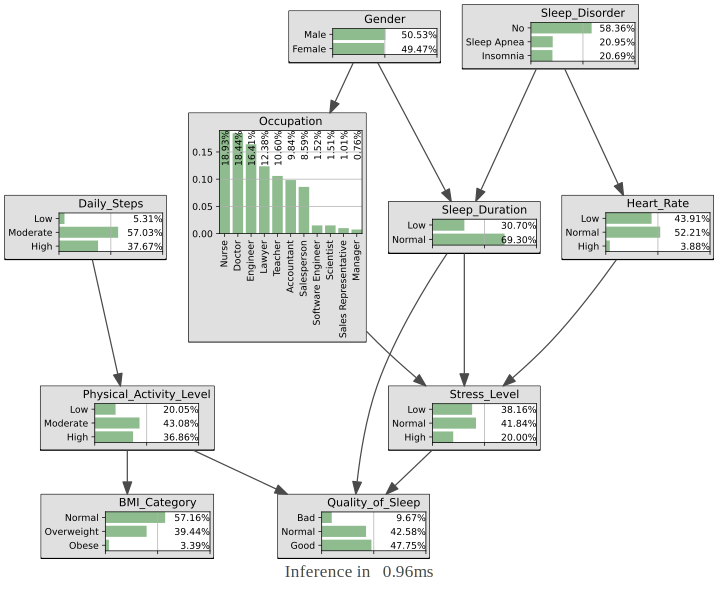

In [5]:
import pyAgrum.skbn as skbn

learner=gum.BNLearner(df, bn)
learner.useMIIC()
learner.useScoreBIC() 
learner.useSmoothingPrior(1)
bn33=learner.learnParameters(bn.dag())
gnb.showInference(bn33,size="10!")

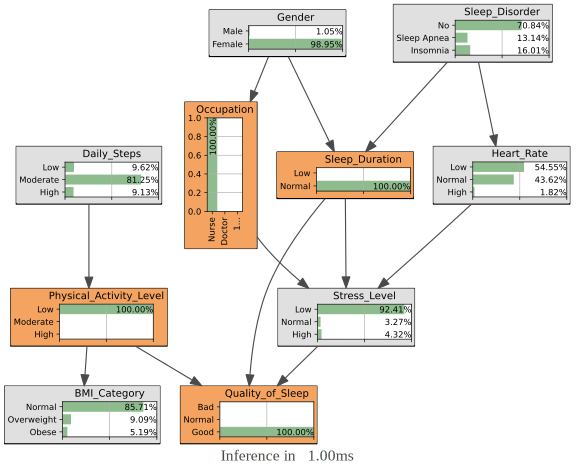

In [6]:
evs = {'Physical_Activity_Level': 'Low', 'Occupation': 'Nurse', 'Sleep_Duration': 'Normal', 'Quality_of_Sleep': 'Good'}
gnb.showInference(bn33,size="8!", evs=evs)

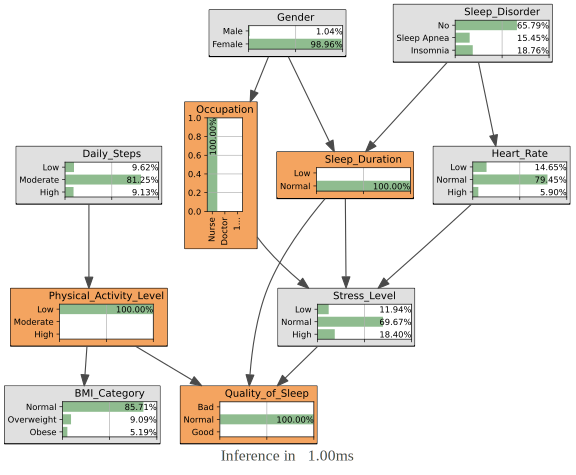

In [7]:
evs = {'Physical_Activity_Level': 'Low', 'Occupation': 'Nurse', 'Sleep_Duration': 'Normal', 'Quality_of_Sleep': 'Normal'}
gnb.showInference(bn33,size="8!", evs=evs)

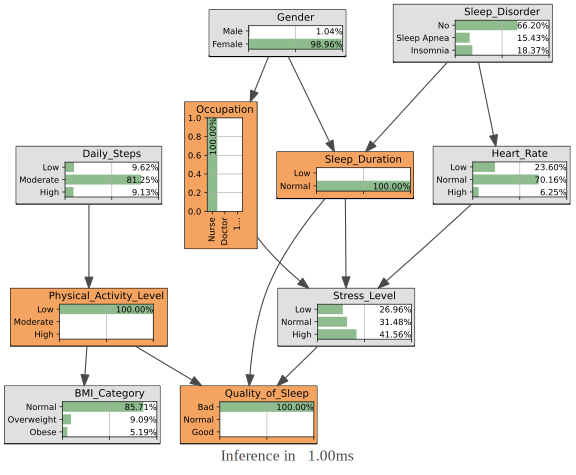

In [8]:

evs = {'Physical_Activity_Level': 'Low', 'Occupation': 'Nurse', 'Sleep_Duration': 'Normal', 'Quality_of_Sleep': 'Bad'}
gnb.showInference(bn33,size="8!", evs=evs)

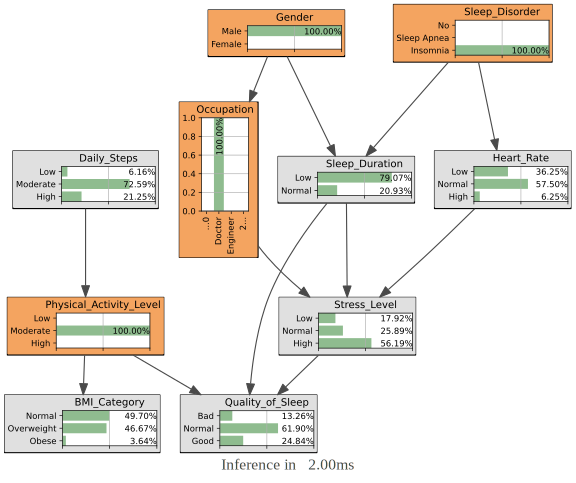

In [9]:
evs = {'Physical_Activity_Level': 'Moderate', 'Occupation': 'Doctor', 'Gender': 'Male', 'Sleep_Disorder': 'Insomnia'}
gnb.showInference(bn33,size="8!", evs=evs)

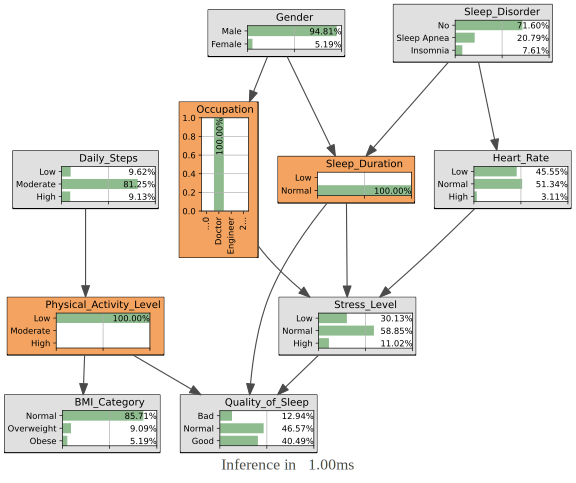

In [10]:
evs = {'Physical_Activity_Level': 'Low', 'Occupation': 'Doctor', 'Sleep_Duration': 'Normal'}
gnb.showInference(bn33,size="8!", evs=evs)

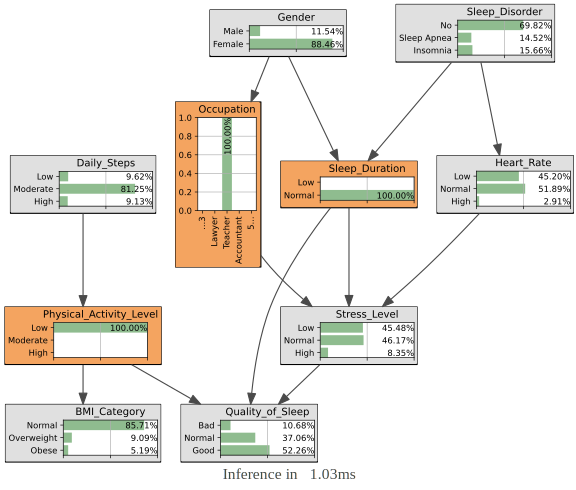

In [9]:
evs = {'Physical_Activity_Level': 'Low', 'Occupation': 'Teacher', 'Sleep_Duration': 'Normal'}
gnb.showInference(bn33,size="8!", evs=evs)

In [ ]:
# df.to_csv('final_data.csv', index=False)

In [12]:
data = pd.read_csv('final_data.csv')
data

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,20−29,Software Engineer,Low,Normal,Moderate,Normal,Overweight,Normal,Low,No
1,2,Male,20−29,Doctor,Low,Normal,Moderate,High,Normal,Normal,High,No
2,3,Male,20−29,Doctor,Low,Normal,Moderate,High,Normal,Normal,High,No
3,4,Male,20−29,Sales Representative,Low,Bad,Low,High,Obese,High,Low,Sleep Apnea
4,5,Male,20−29,Sales Representative,Low,Bad,Low,High,Obese,High,Low,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,50−59,Nurse,Normal,Good,High,Low,Overweight,Low,Moderate,Sleep Apnea
370,371,Female,50−59,Nurse,Normal,Good,High,Low,Overweight,Low,Moderate,Sleep Apnea
371,372,Female,50−59,Nurse,Normal,Good,High,Low,Overweight,Low,Moderate,Sleep Apnea
372,373,Female,50−59,Nurse,Normal,Good,High,Low,Overweight,Low,Moderate,Sleep Apnea


In [21]:
import pyAgrum.lib.explain as explain
explain.showInformation(bn33, {}, size="14")

In [25]:
import pyAgrum.lib.explain as exp
info_str = exp.getInformation(bn33)

import re
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML string
soup = BeautifulSoup(info_str, 'html.parser')

# Extract node information into a table
node_entries = []
for node in soup.find_all('g', class_='node'):
    title_tag = node.find('title')
    if title_tag:
        node_name = title_tag.get_text().strip()
    a_tag = node.find('a')
    if a_tag and a_tag.has_attr('xlink:title'):
        title_attr = a_tag['xlink:title']
        # Expected format: "(<order>) <NodeName> : <EntropyValue>"
        match = re.search(r'\((.*?)\)\s*(.*?)\s*:\s*([0-9.]+)', title_attr)
        if match:
            order, name, entropy_val = match.groups()
            node_entries.append({'Node': name, 'Entropy': float(entropy_val)})
node_table = pd.DataFrame(node_entries)
print("Extracted Node Entropy Table:")
print(node_table)

# Extract edge (mutual information) information into a table
edge_entries = []
for edge in soup.find_all('g', class_='edge'):
    title_tag = edge.find('title')
    if title_tag:
        edge_text = title_tag.get_text().strip()
        # Expected format: "Source->Target"
    a_tag = edge.find('a')
    if a_tag and a_tag.has_attr('xlink:title'):
        title_attr = a_tag['xlink:title']
        # Expected format: "4 → 5 : 0.13273987362997536"
        match = re.search(r'(.+?)→(.+?)\s*:\s*([0-9.]+)', title_attr)
        if match:
            source, target, mi_val = match.groups()
            # Clean up extra spaces
            source = source.strip()
            target = target.strip()
            edge_entries.append({'Source': source, 'Target': target, 'Mutual Information': float(mi_val)})
edge_table = pd.DataFrame(edge_entries)
print("\nExtracted Edge Mutual Information Table:")
print(edge_table)


Extracted Node Entropy Table:
                      Node  Entropy
0             BMI_Category  1.15622
1             Stress_Level  1.52068
2         Quality_of_Sleep  1.35954
3              Daily_Steps  1.21740
4  Physical_Activity_Level  1.51898
5           Sleep_Duration  0.88974
6           Sleep_Disorder  1.39619
7               Heart_Rate  1.19294
8               Occupation  2.98556
9                   Gender  0.99992

Extracted Edge Mutual Information Table:
   Source Target  Mutual Information
0       4      5            0.132740
1       0      1            0.233326
2       7      4            0.079611
3       7      5            0.141148
4       8      7            0.105902
5       8      9            0.042340
6       3      4            0.102203
7       9      4            0.128496
8       2      7            0.024752
9       2      3            0.586980
10      1      6            0.083187
11      1      5            0.013292


In [ ]:
import pyAgrum as gum
import pandas as pd
import itertools

ie = gum.LazyPropagation(bn33)
ie.makeInference()

entropy_data = []
for node in bn33.names():
    marg = ie.posterior(node)
    entropy_data.append({'Node': node, 'Entropy': marg.entropy()})
entropy_table = pd.DataFrame(entropy_data)
print("Entropy Table:")
print(entropy_table)

Entropy Table:
                      Node   Entropy
0             BMI_Category  1.156220
1             Stress_Level  1.520685
2              Daily_Steps  1.217402
3           Sleep_Duration  0.889738
4           Sleep_Disorder  1.396195
5         Quality_of_Sleep  1.359538
6               Occupation  2.985556
7               Heart_Rate  1.192945
8                   Gender  0.999918
9  Physical_Activity_Level  1.518977
